In [9]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import linecache

In [27]:
# set data path
basepath = "/home/emily/Desktop/isamoa_data/"
mpipath = basepath + "good5_sb32n16t_d26min66_mpi_1458983"
fitpath = basepath + "good3_sb32n16t_d26min66_irmfit_1458883"

jobid = mpipath[-7:]
mpi_filename = mpipath + '/' + jobid + '.log'
print(mpi_filename)

jobid = fitpath[-7:]
fit_filename = fitpath + '/' + jobid + '.log'
print(fit_filename)

files = [mpi_filename, fit_filename]
labels = ['Static MPI w. 512 ranks','Elastic MPI w. increasing ranks']
colors = ['red','blue']

/home/emily/Desktop/isamoa_data/good5_sb32n16t_d26min66_mpi_1458983/1458983.log
/home/emily/Desktop/isamoa_data/good3_sb32n16t_d26min66_irmfit_1458883/1458883.log


# Process Data from 2 files

In [11]:
all_markers = []
all_nranks = []
all_ncells = []
all_nelaps = []
all_mcells = []
all_msteps = []

for file in files:

    markers = []
    nranks = []
    ncells = []
    nelaps = []
    mcells = []
    msteps = []

    ####################
    # impi exec times
    ####################

    f = open(file, 'r')
    for i, line in enumerate(f,1):

        # find all "phase statistics" line numbers
        if "Phase statistics:" in line:
            markers = markers + [i]

        # Get nranks & ncells vs. time
        if ">>>" in line:
            larr = line.split()
            try:
                ranks = int(larr[-1])
                cells = int(larr[-3][:-1])
                elaps = float(larr[-5][:-1])
            except:
                pass
            else: 
                nranks = nranks + [ranks]
                nelaps = nelaps + [elaps]
                ncells = ncells + [cells * ranks]   

            # Get mcells vs. time steps
            if "time step:" in line:
                idx = larr.index('step:')
                msteps = msteps + [int(larr[idx+1][:-1])]
                idx = larr.index('cells:')
                mcells = mcells + [cells * ranks]      
    f.close()
    
    all_markers = all_markers + [markers]
    all_nranks = all_nranks + [nranks]
    all_ncells = all_ncells + [ncells]
    all_nelaps = all_nelaps + [nelaps]
    all_mcells = all_mcells + [mcells]
    all_msteps = all_msteps + [msteps]


print(all_markers)
    
print(all_markers[0])



[[74, 93, 9169], [76, 95, 161, 3302, 5435, 8008, 9361]]
[74, 93, 9169]


# # Cells vs. Time step

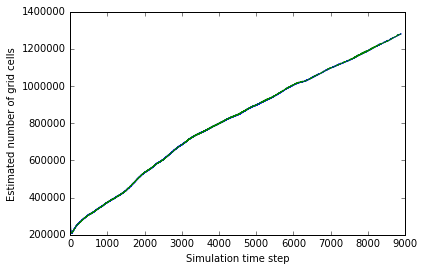

In [14]:
fig = plt.figure()
ax = fig.gca()

for i in range(0, len(files)):
    msteps = all_msteps[i]
    mcells = all_mcells[i]    
    ax.plot(msteps, mcells)

ax.set_xlabel("Simulation time step")
ax.set_ylabel("Estimated number of grid cells")
    
    
#fig.savefig(path+"/cells_vs_steps.pdf",bbox_inches="tight")

# # Ranks vs. Exec Time

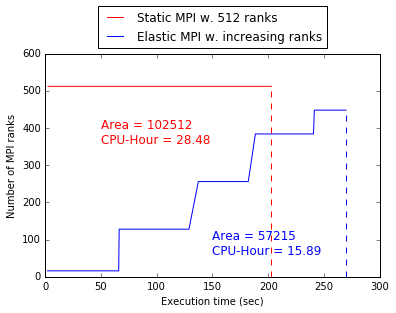

In [47]:
fig = plt.figure()
ax = fig.gca()

areas = [None] * len(files)
cpuhr = [None] * len(files)
for i in range(0, len(files)):
    nelaps = all_nelaps[i]
    nranks = all_nranks[i]    
    ax.plot(nelaps, nranks, color=colors[i], label=labels[i])
    ax.plot((nelaps[-1], nelaps[-1]), (0, nranks[-1]), color=colors[i], linestyle='--')
    
    areas[i] = np.trapz(nranks, x=nelaps)
    cpuhr[i] = areas[i]/3600

ax.set_xlabel("Execution time (sec)")
ax.set_ylabel("Number of MPI ranks")
lgd = ax.legend(loc="lower center", bbox_to_anchor=(0.5, 1))

ax.text(50, 400, r'Area = %d' % areas[0], color=colors[0], fontsize=12)
ax.text(50, 360, r'CPU-Hour = %.2f' % cpuhr[0], color=colors[0], fontsize=12)

ax.text(150, 100, r'Area = %d' % areas[1], color=colors[1], fontsize=12)
ax.text(150, 60, r'CPU-Hour = %.2f' % cpuhr[1], color=colors[1], fontsize=12)

fig.savefig(basepath + "/cpu-hr_comparison.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

[[<matplotlib.lines.Line2D object at 0x7fc7a036f160>], [<matplotlib.lines.Line2D object at 0x7fc7a036fba8>]]
